In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold

In [3]:
# importando base de dados
a1_data = pd.read_csv("aula7/a1-in.csv", delimiter=',')
a1_data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,14400,B,T9Q,0,Z,600865,0,1,0,Wholecarpet,Y,3,4,1,2,770.5,0.004043,0
1,14401,B,T9Q,0,Z,596466,0,1,1,Wholecarpet,Y,3,4,1,2,770.5,0.004043,23
2,14402,B,T9Q,0,Z,616590,0,1,2,Wholecarpet,Y,3,4,1,2,770.5,0.004043,25
3,14403,B,T9Q,0,Z,734358,1,1,3,Wholecarpet,Y,3,4,1,2,770.5,0.004043,27
4,14404,B,T9Q,0,Z,826308,1,1,4,Wholecarpet,Y,3,4,1,2,770.5,0.004043,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,C,T0V,4,Z,979370,0,17,343,Wholedesks,Y,4,5,1,2,730.2,0.003600,1094
27727,42127,C,T0V,4,Z,796316,1,16,344,Wholedesks,Y,4,5,1,2,730.2,0.003600,1097
27728,42128,C,T0V,4,Z,890896,1,16,345,Wholedesks,Y,4,5,1,2,730.2,0.003600,1101
27729,42129,C,T0V,4,Z,506875,0,17,346,Wholedesks,Y,4,5,1,2,730.2,0.003600,1104


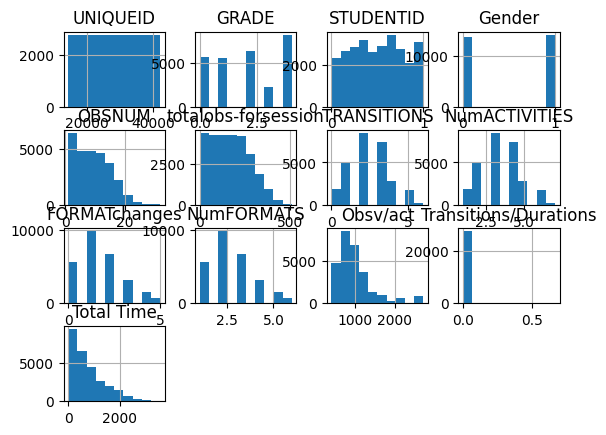

In [4]:
a1_data.hist()
pyplot.show()

In [5]:
a1_data.shape

(27731, 18)

In [6]:
a1_data.dtypes

UNIQUEID                   int64
SCHOOL                    object
Class                     object
GRADE                      int64
CODER                     object
STUDENTID                  int64
Gender                     int64
OBSNUM                     int64
totalobs-forsession        int64
Activity                  object
ONTASK                    object
TRANSITIONS                int64
NumACTIVITIES              int64
FORMATchanges              int64
NumFORMATS                 int64
Obsv/act                 float64
Transitions/Durations    float64
Total Time                 int64
dtype: object

In [7]:
# verificando total de dados duplicados
duplicated = a1_data.duplicated().sum()

# verficando colunas com valores NaN
nan = a1_data.isna().any().sum()

print('valores duplicados: {}'.format(duplicated))
print('valores nulos: {}'.format(nan))

valores duplicados: 0
valores nulos: 0


In [8]:
# one hot encoding
a1_encoded = pd.get_dummies(a1_data, columns=['SCHOOL', 'Class', 'CODER', 'Activity'])
a1_encoded

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,...,Class_T9U,Class_T9V,CODER_Y,CODER_Z,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks
0,14400,0,600865,0,1,0,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
1,14401,0,596466,0,1,1,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
2,14402,0,616590,0,1,2,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
3,14403,0,734358,1,1,3,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
4,14404,0,826308,1,1,4,Y,3,4,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,4,979370,0,17,343,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27727,42127,4,796316,1,16,344,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27728,42128,4,890896,1,16,345,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27729,42129,4,506875,0,17,346,Y,4,5,1,...,False,False,False,True,False,False,False,False,False,True


In [9]:
# transformando ontask em uma variável numérica
a1_encoded['ONTASK'].replace(['N','Y'], [0,1], inplace=True)
a1_encoded

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,...,Class_T9U,Class_T9V,CODER_Y,CODER_Z,Activity_Dancing,Activity_Individual,Activity_Smallgroup,Activity_Testing,Activity_Wholecarpet,Activity_Wholedesks
0,14400,0,600865,0,1,0,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
1,14401,0,596466,0,1,1,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
2,14402,0,616590,0,1,2,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
3,14403,0,734358,1,1,3,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
4,14404,0,826308,1,1,4,1,3,4,1,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27726,42126,4,979370,0,17,343,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27727,42127,4,796316,1,16,344,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27728,42128,4,890896,1,16,345,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True
27729,42129,4,506875,0,17,346,1,4,5,1,...,False,False,False,True,False,False,False,False,False,True


In [10]:
'''
# Normalização
scaler = MinMaxScaler()
a1_scaled = scaler.fit_transform(a1_encoded)
a1_scaled = pd.DataFrame(a1_scaled, columns=a1_encoded.columns)
a1_scaled
'''

'\n# Normalização\nscaler = MinMaxScaler()\na1_scaled = scaler.fit_transform(a1_encoded)\na1_scaled = pd.DataFrame(a1_scaled, columns=a1_encoded.columns)\na1_scaled\n'

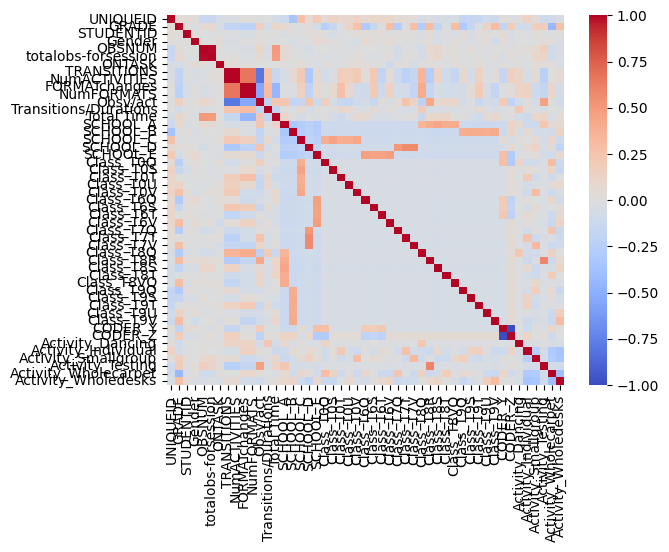

In [11]:
# Gerando um heatmap para enteder quais variáveis estão mais correlacionadas
sns.heatmap(a1_encoded.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

Variáveis usadas no artigo:

Gender, GRADE, Transitions/Durations, Activity_Dancing, Activity_Individual, Activity_Smallgroup, Activity_Testing, Activity_Wholecarpet, Activity_Wholedesks, TRANSITIONS

In [12]:
# y -> target (variavel dependete)
# x -> variaveis independentes
y = a1_encoded[["ONTASK"]]
x = a1_encoded[["Gender", "GRADE", "Transitions/Durations", "Activity_Dancing", "Activity_Individual", "Activity_Smallgroup", "Activity_Testing", "Activity_Wholecarpet", "Activity_Wholedesks", "TRANSITIONS"]]

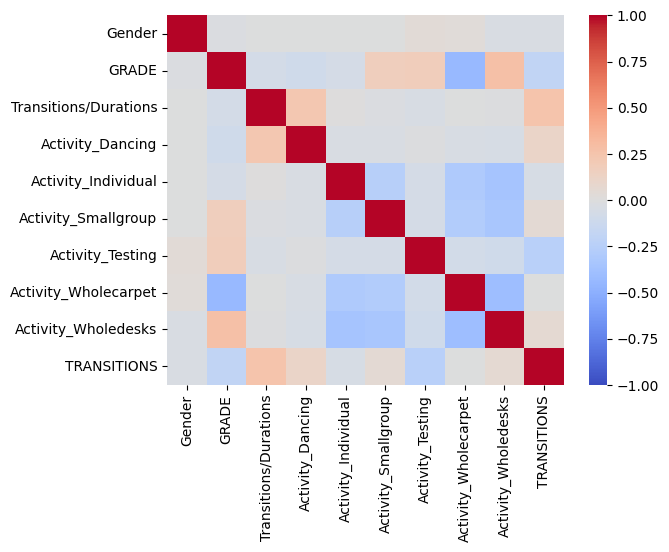

In [13]:
# Gerando um novo heatmap apenas com as variáveis selecionadas para o treinamento
sns.heatmap(x.corr(), xticklabels=True, yticklabels=True, annot=False, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [14]:
# fazendo split do dataset
x_train, x_test, y_train, y_test = train_test_split(x, y)

# **Diferentes modelos**

1.   Árvores de decisão
2.   SVM
3.   Regressão probabilistica



In [26]:
# criando um modelo de árvores de decisão
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(clf, x_train, y_train, cv=kf, scoring='accuracy')

for i, accuracy in enumerate(accuracy_scores, 1):
  print(f'Fold {i}: Acurácia = {accuracy:.2f}')

mean_accuracy = np.mean(accuracy_scores)
print(f'Média de acurácia: {mean_accuracy:.2f}\n')

y_pred = clf.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(clf.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['ONTASK'])

Fold 1: Acurácia = 0.68
Fold 2: Acurácia = 0.67
Fold 3: Acurácia = 0.68
Fold 4: Acurácia = 0.68
Fold 5: Acurácia = 0.68
Fold 6: Acurácia = 0.69
Fold 7: Acurácia = 0.69
Fold 8: Acurácia = 0.67
Fold 9: Acurácia = 0.68
Fold 10: Acurácia = 0.67
Média de acurácia: 0.68

0.6914126358303683
              precision    recall  f1-score   support

           0       0.51      0.20      0.28      2231
           1       0.71      0.91      0.80      4702

    accuracy                           0.68      6933
   macro avg       0.61      0.55      0.54      6933
weighted avg       0.64      0.68      0.63      6933



In [25]:
# criando um modelo de svm
svm_model = svm.SVC(kernel='sigmoid')
svm_model.fit(x_train, y_train.values.ravel())

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(svm_model, x_train, y_train, cv=kf, scoring='accuracy')

for i, accuracy in enumerate(accuracy_scores, 1):
  print(f'Fold {i}: Acurácia = {accuracy:.2f}')

mean_accuracy = np.mean(accuracy_scores)
print(f'Média de acurácia: {mean_accuracy:.2f}\n')

y_pred = svm_model.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# f1 score
f1 = f1_score(y_test, y_pred, average=None)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(svm_model.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['ONTASK'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Fold 1: Acurácia = 0.55
Fold 2: Acurácia = 0.54
Fold 3: Acurácia = 0.58
Fold 4: Acurácia = 0.57
Fold 5: Acurácia = 0.57
Fold 6: Acurácia = 0.57
Fold 7: Acurácia = 0.58
Fold 8: Acurácia = 0.53
Fold 9: Acurácia = 0.57
Fold 10: Acurácia = 0.56
Média de acurácia: 0.56

0.5647658428695067
              precision    recall  f1-score   support

           0       0.34      0.36      0.35      2231
           1       0.69      0.67      0.68      4702

    accuracy                           0.57      6933
   macro avg       0.51      0.51      0.51      6933
weighted avg       0.57      0.57      0.57      6933



In [24]:
# criando um modelo de regressão logistica
pr_model = LogisticRegression(solver='lbfgs', max_iter=5000)
pr_model.fit(x_train, y_train.values.ravel())

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

accuracy_scores = cross_val_score(pr_model, x_train, y_train, cv=kf, scoring='accuracy')

for i, accuracy in enumerate(accuracy_scores, 1):
  print(f'Fold {i}: Acurácia = {accuracy:.2f}')

mean_accuracy = np.mean(accuracy_scores)
print(f'Média de acurácia: {mean_accuracy:.2f}\n')

y_pred = pr_model.predict(x_test)

# matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# acurácia
acc = accuracy_score(y_test, y_pred)

# precisão
precision = precision_score(y_test, y_pred, average=None, zero_division=1)

# recall
recall = recall_score(y_test, y_pred, average=None, zero_division=1)

# f1 score
f1 = f1_score(y_test, y_pred, average=None)

# acurácia balanceada
ba = balanced_accuracy_score(y_test, y_pred)

# kappa
kappa = cohen_kappa_score(y_test, y_pred)

print(pr_model.score(x_train, y_train))

print(classification_report(y_test, y_pred, zero_division=1))

grade_predictions = pd.DataFrame(y_pred, columns=['ONTASK'])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Fold 1: Acurácia = 0.67
Fold 2: Acurácia = 0.67
Fold 3: Acurácia = 0.67
Fold 4: Acurácia = 0.68
Fold 5: Acurácia = 0.67
Fold 6: Acurácia = 0.69
Fold 7: Acurácia = 0.68
Fold 8: Acurácia = 0.65
Fold 9: Acurácia = 0.67
Fold 10: Acurácia = 0.65
Média de acurácia: 0.67

0.6699682661794404
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2231
           1       0.68      1.00      0.81      4702

    accuracy                           0.68      6933
   macro avg       0.84      0.50      0.40      6933
weighted avg       0.78      0.68      0.55      6933



# Os resultados de acurácia dos algoritmos foram:

**Utilizando 5 folds**

árvores: 68%

SMV: 56%

Regressão probabilistica: 67%

Utilizando estes três algoritmos de classificação, é possível notear que as árvores e a regressão tiveram um resultado semelhante com uma leve vantagem para as árvores. Já o algoritmo de SVM teve a pior acurácia.

**Utilizando 10 folds**

árvores: 68%

SMV: 56%

Regressão probabilistica: 67%

Os testes com 10 folds mostram resultados basicamente iguais na média final.